# Regularization Techniques in Regression

This summary outlines four commonly used regularization techniques in regression: **Ridge**, **Lasso**, **Relaxed Lasso**, and **Elastic Net**. These methods are designed to prevent overfitting and improve model generalization by adding penalty terms to the loss function.

---

## 📘 Ridge Regression (L2 Regularization)

- **Objective**: Minimizes the sum of squared residuals with an L2 penalty on the coefficients.
- **Loss Function**:  
  $$ \min_\beta \|y - X\beta\|^2_2 + \lambda \|\beta\|^2_2 $$
- **Penalty Term**: $ \lambda \sum \beta_j^2 $
- **Effect**: Shrinks coefficients but does **not** force them to zero (shrink to zero smoothly, but rarely exactly zero).
- **Use Case**: Multicollinearity or when all features are believed to contribute to the outcome.
- **Solution**: $$\beta^{OLS} = (X'X)^{-1}X'y$$
- **Multicollinearity** : If $X'X$ is nearly singular because of the multicollinearity, we use the penalty term $kI$ where $k$ is the ridge parameter and we have the new estimator $$\hat\beta^{Ridge} = (X'X+kI)^{-1}X'y$$
---

## 📕 Lasso Regression (L1 Regularization)

- **Objective**: Minimizes the sum of squared residuals with an L1 penalty on the coefficients.
- **Loss Function**:  
  $$ \min_\beta \frac{1}{2n}\|y - X\beta\|^2_2 + \lambda \|\beta\|_1 $$
- **Penalty Term**: $ \lambda \sum |\beta_j| $ (absolute sum of coefficients, which explains why the small coefficients are shrunk exactly to zero in Lasso.)
- **Effect**: Encourages **sparsity**, often setting some coefficients **exactly to zero** (force some coefficient to be exactly zero, useful for feature selection).
- **Use Case**: Feature selection and interpretability.
- **solution**: No closed form due to the L1 term. For one dimensional case(i.e. only one feature), the Lasso solution simplifies to the soft-thresholding operator $$\hat\beta = sign(z)\cdot max(|z|-\lambda, 0)$$ where $z = \frac{1}{n}\sum x_i (y_i-\hat y_{-j})$ and $y_{-j}$ is the prediction excluding the j-th feature. 


---

## 📙 Relaxed Lasso Regression

- **Objective**: Decouples variable selection from coefficient estimation by relaxing the shrinkage after selecting variables via Lasso.
- **Two-Step Process**:
  1. **Selection** via Lasso.
  2. **Refitting** using a relaxed penalty:
     $$ \hat{\beta}^{\text{relax}} = (1 - \phi) \hat{\beta}^{\text{OLS}} + \phi \hat{\beta}^{\text{lasso}} $$
     where $ \phi \in [0,1] $ controls relaxation.
- **Effect**: Mitigates Lasso’s bias toward zero while preserving sparsity.
- **Use Case**: When Lasso over-shrinks the selected variables and you want better prediction accuracy.

---

## 📗 Elastic Net Regression

- **Objective**: Combines L1 and L2 penalties for regularization.
- **Loss Function**:  
  $$ \min_\beta \|y - X\beta\|^2_2 + \lambda_1 \|\beta\|_1 + \lambda_2 \|\beta\|^2_2 $$
  or in a common parametrization:
  $$ \min_\beta \|y - X\beta\|^2_2 + \lambda [ \alpha \|\beta\|_1 + (1 - \alpha) \|\beta\|^2_2 ] $$
- **Effect**: Balances variable selection and grouping effect of correlated variables.
- **Use Case**: High-dimensional settings with many features are correlated where Lasso alone might drop too many correlated features, and Ridge alone doesn't do feature selection.

---

## 📊 Summary Table: Shrinkage and Feature Selection Behavior

| Method           | Penalty Type          | Constraint Shape               | Feature Selection | Handles Correlation | Bias                   |
|------------------|-----------------------|---------------------------------|------------------|--------------------|------------------------|
| Ridge Regression | L2 (squared norm)     | Circle                         | ❌ No             | ✅ Yes             | Low                    |
| Lasso Regression | L1 (absolute norm)    | Diamond (sharp corners)        | ✅ Yes           | ❌ No (drops correlated features) | High (may overshrink)  |
| Elastic Net      | Mix of L1 and L2      | Rounded diamond                | ✅ Yes (softer)  | ✅ Yes             | Medium                 |
| Relaxed Lasso    | L1 selection + OLS fit| Diamond selection → free plane | ✅ Yes           | ✅ Yes (with relaxation) | Lower than Lasso        |

## ✅ Notes:
- Ridge: Smooth shrinkage, no selection.
- Lasso: Strong shrinkage, exact zeros, good for sparse models.
- Elastic Net: Balance between Ridge and Lasso, handles correlated features well.
- Relaxed Lasso: Selects like Lasso, refits like OLS to reduce bias.



---

# Comparisons of methods in Python
### Use scikit-learn python package : [link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

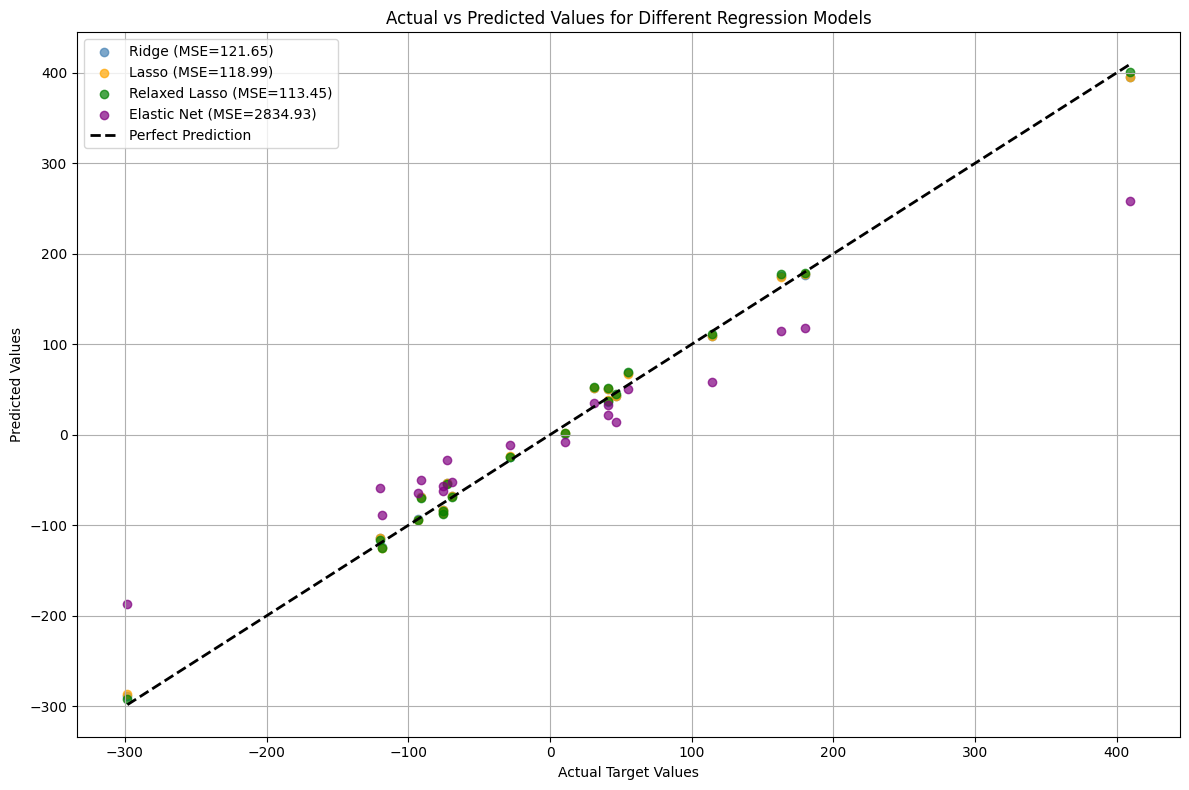

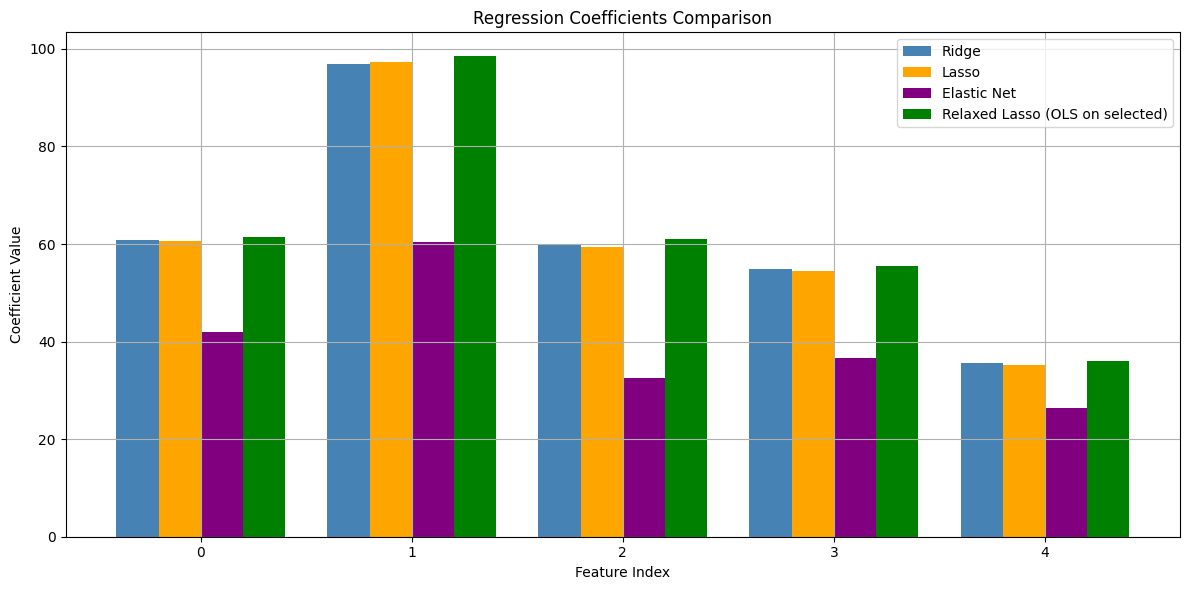

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# ----------------------------
# Generate synthetic regression dataset
# ----------------------------
np.random.seed(42)
X, y = make_regression(n_samples=100, n_features=5, noise=10, random_state=42)
# 100 samples, 5 features, with some added noise

# ----------------------------
# Split the data into training and testing sets
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ==============================================================
# 1. Ridge Regression (L2 Regularization)
# Penalizes the square of the coefficients (L2 norm)
# Helps when features are correlated, shrinks coefficients but does not set them to zero
# ==============================================================
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# ==============================================================
# 2. Lasso Regression (L1 Regularization)
# Penalizes the absolute value of the coefficients (L1 norm)
# Can shrink some coefficients exactly to zero (useful for feature selection)
# ==============================================================
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

# ==============================================================
# 3. Relaxed Lasso (Two-stage approach)
# Stage 1: Use Lasso for feature selection (keep nonzero coefficients)
# Stage 2: Fit Ordinary Least Squares (OLS) only on the selected features
# Purpose: Reduce Lasso's bias while keeping sparsity
# ==============================================================
lasso_relaxed = Lasso(alpha=1.0)
lasso_relaxed.fit(X_train, y_train)
selected_features = np.where(lasso_relaxed.coef_ != 0)[0]

if selected_features.size > 0:
    # If any features were selected by Lasso
    X_train_selected = X_train[:, selected_features]
    X_test_selected = X_test[:, selected_features]

    # Refit OLS on the selected features
    ols = LinearRegression()
    ols.fit(X_train_selected, y_train)
    y_pred_relaxed = ols.predict(X_test_selected)
    mse_relaxed = mean_squared_error(y_test, y_pred_relaxed)
else:
    # If no features selected, predict the mean as a fallback
    y_pred_relaxed = np.full_like(y_test, y_train.mean())
    mse_relaxed = mean_squared_error(y_test, y_pred_relaxed)

# ==============================================================
# 4. Elastic Net Regression (Combination of L1 and L2 Regularization)
# l1_ratio = 0.5 means equal contribution of L1 and L2
# Useful when there are multiple correlated features and we want both feature selection and shrinkage
# ==============================================================
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)
y_pred_enet = elastic_net.predict(X_test)
mse_enet = mean_squared_error(y_test, y_pred_enet)

# Define consistent colors for all models
colors = {
    'Ridge': 'steelblue',
    'Lasso': 'orange',
    'Relaxed Lasso': 'green',
    'Elastic Net': 'purple'
}

# ==============================================================
# Visualization 1: Bar plot for MSE comparison
# ==============================================================
#methods = ['Ridge', 'Lasso', 'Relaxed Lasso', 'Elastic Net']
#mse_values = [mse_ridge, mse_lasso, mse_relaxed, mse_enet]

#plt.figure(figsize=(8, 6))
#plt.bar(methods, mse_values, color=[colors[m] for m in methods])
#plt.ylabel('Mean Squared Error (MSE)')
#plt.title('MSE Comparison of Regression Methods')
#plt.grid(axis='y')
#plt.tight_layout()
#plt.show()

# ==============================================================
# Visualization 2: Actual vs Predicted plot with color matching
# ==============================================================
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred_ridge, label=f'Ridge (MSE={mse_ridge:.2f})', color=colors['Ridge'], alpha=0.7)
plt.scatter(y_test, y_pred_lasso, label=f'Lasso (MSE={mse_lasso:.2f})', color=colors['Lasso'], alpha=0.7)
plt.scatter(y_test, y_pred_relaxed, label=f'Relaxed Lasso (MSE={mse_relaxed:.2f})', color=colors['Relaxed Lasso'], alpha=0.7)
plt.scatter(y_test, y_pred_enet, label=f'Elastic Net (MSE={mse_enet:.2f})', color=colors['Elastic Net'], alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Target Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Different Regression Models')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ==============================================================
# Visualization 3: Coefficients comparison between models with consistent colors
# ==============================================================
plt.figure(figsize=(12, 6))
indices = np.arange(X.shape[1])
plt.bar(indices - 0.3, ridge.coef_, width=0.2, label='Ridge', align='center', color=colors['Ridge'])
plt.bar(indices - 0.1, lasso.coef_, width=0.2, label='Lasso', align='center', color=colors['Lasso'])
plt.bar(indices + 0.1, elastic_net.coef_, width=0.2, label='Elastic Net', align='center', color=colors['Elastic Net'])

if selected_features.size > 0:
    ols_coefs = np.zeros(X.shape[1])
    ols_coefs[selected_features] = ols.coef_
    plt.bar(indices + 0.3, ols_coefs, width=0.2, label='Relaxed Lasso (OLS on selected)', align='center', color=colors['Relaxed Lasso'])

plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Regression Coefficients Comparison')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
